In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

## File processing functionalities

In [11]:
# Metrics
def index_difficulty(d, w):
  return math.log2((2*d) / w)

def index_performance(id, mt):
  return id / mt

def get_id_col(df):
  return df.apply(lambda row: index_difficulty(row['A'], row['w']), axis=1)
# ============================================================================

# File reading / analysis
def get_name_device_mode(filename):
  name, a, b = filename.lower().split("/")[-1].split('_')[:3]

  # some file were named "name_device_mode" and some "name_mode_device"
  if a in ["tablet", "mouse"]:
    device = a
    mode = b
  else:
    device = b
    mode = a
  return name, device, mode

def analyse_file(filename):
  df = pd.read_csv(filename, skiprows=2)
  avg_click = df['clickTime'].mean()
  total_time = df['clickTime'].sum()
  errors = df['currentNumberOfErrors'].array[-1]
  name, device, mode = get_name_device_mode(filename)

  # give info for combined df
  df["device"] = device
  df["mode"] = mode

  return df, [name, device, mode, avg_click, total_time, errors]
# ============================================================================

In [13]:
# reading all csv files in "folder_name" make a table with total time / avg_click / errors
# also make combined df which contains every click data of all csv files
folder_name = 'data/'

table = []
combined_df = pd.DataFrame()
for filename in glob.glob(f'{folder_name}*.csv'):
  df, row = analyse_file(filename)
  table.append(row)
  combined_df = pd.concat([combined_df, df])

# add id metric
combined_df["ID"] = get_id_col(combined_df)

# make df from table
df = pd.DataFrame(table, columns=["Name", "Device", "Mode", "AvgTime", "Total Time", "Errors"])

In [14]:
df.sort_values(by=["Name", "Device", "Mode"])

,Name,Device,Mode,AvgTime,Total Time,Errors
5,alex,mouse,bubble,1.125529,272.378,3
40,alex,mouse,normal,1.168946,282.885,12
4,alex,tablet,bubble,1.153112,279.053,35
41,alex,tablet,normal,1.246343,301.615,45
25,ana,mouse,bubble,1.429256,345.880,1
34,ana,mouse,normal,1.238508,299.719,8
33,ana,tablet,bubble,1.350161,326.739,6
16,ana,tablet,normal,1.516591,367.015,33
6,gabriel,mouse,bubble,1.094678,264.912,3
37,gabriel,mouse,normal,1.226008,296.694,9


In [15]:
set(combined_df["ID"])

{4.0,
 4.415037499278844,
 4.584962500721156,
 5.0,
 5.415037499278844,
 5.584962500721156,
 6.0}

## Initial analysis

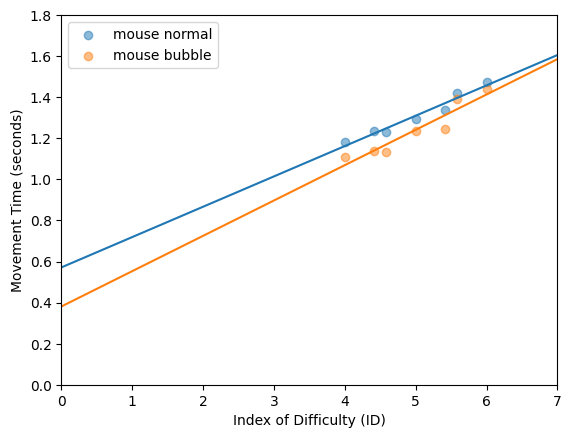

In [16]:
# x_axis = [0, 7]
# y_axis = [0, 1.8]
# tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
# extended_x = np.linspace(*x_axis, 100)

# for d in ["mouse", "tablet"]:
#   for m in ["normal", "bubble"]:
#     x = tmp.T[d][m].T.index.to_numpy()
#     y = tmp.T[d][m].T["clickTime"].to_numpy()
#     plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
#     p = np.polyfit(x, y, 1)
#     plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

# plt.legend()
# plt.axis(x_axis + y_axis)
# plt.xlabel("Index of Difficulty (ID)")
# plt.ylabel("Movement Time (seconds)")
# plt.show()
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["mouse"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

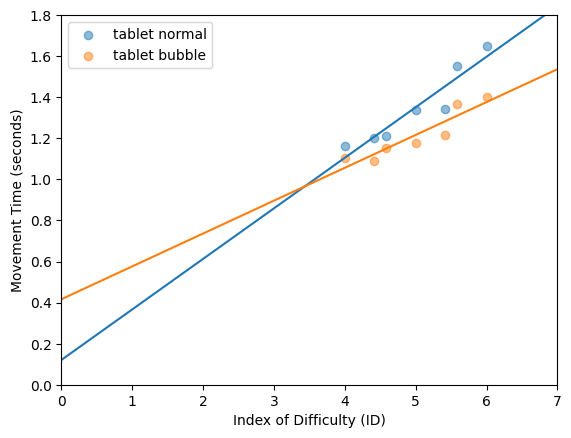

In [17]:
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["tablet"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

In [18]:
# stats for groups
df.groupby(["Device", "Mode"]).describe()

AvgTime                                                    \
                count      mean       std       min       25%       50%   
Device Mode                                                               
mouse  bubble    11.0  1.239757  0.161037  1.087525  1.117060  1.143483   
       normal    11.0  1.306471  0.145964  1.168946  1.232258  1.259566   
tablet bubble    11.0  1.207353  0.149591  0.955058  1.126857  1.212285   
       normal    11.0  1.347750  0.190738  1.099004  1.223800  1.324310   

                                  Total Time              ...            \
                    75%       max      count        mean  ...       75%   
Device Mode                                               ...             
mouse  bubble  1.365597  1.545640       11.0  300.021273  ...  330.4745   
       normal  1.325347  1.697496       11.0  316.165909  ...  320.7340   
tablet bubble  1.297944  1.477145       11.0  292.179364  ...  314.1025   
       normal  1.448884  1.720872       11.0  326.155455  ...  350.6300   

                       Errors                                                 \
                   max  count       mean        std   min   25%   50%    75%   
Device Mode                                                                    
mouse  bubble  374.045   11.0   8.545455  12.620330   1.0   2.5   4.0    9.5   
       normal  410.794   11.0  24.272727  18.574665   2.0   9.0  19.0   38.5   
tablet bubble  357.469   11.0  41.545455  35.889730   6.0  17.5  29.0   47.5   
       normal  416.451   11.0  80.363636  60.800120  21.0  44.0  47.0  105.5   

                      
                 max  
Device Mode           
mouse  bubble   45.0  
       normal   53.0  
tablet bubble  113.0  
       normal  203.0  

[4 rows x 24 columns]

<AxesSubplot:>

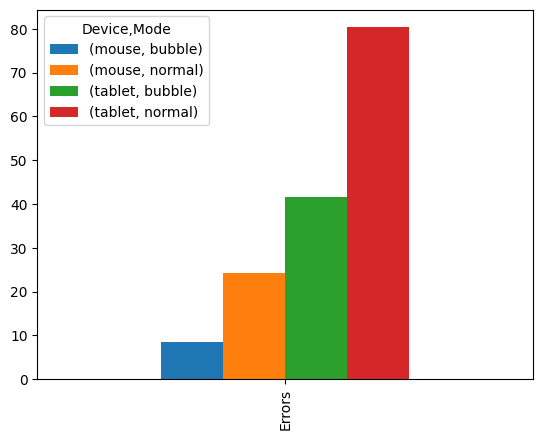

In [19]:
# plotting test
df.groupby(["Device", "Mode"])[["Errors"]].mean().T.plot.bar()

<AxesSubplot:>

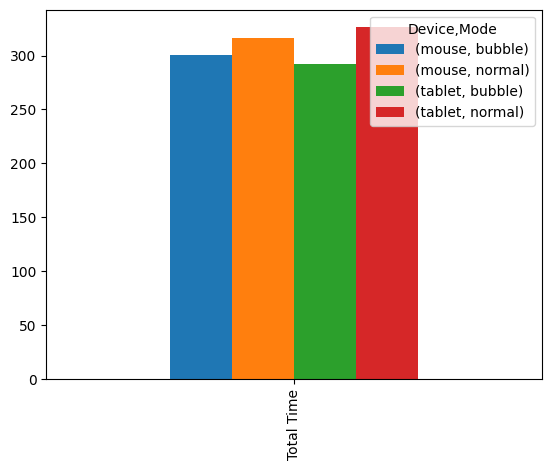

In [20]:
df.groupby(["Device", "Mode"])[["Total Time"]].mean().T.plot.bar()

## Time series over the four combinations

For each of the four combinations, (MN, MB, TN, TB) we will take the average results from the participants and plot them as the test progresses

In [22]:
import os 

device = 'mouse'
cursor = 'normal'

filter( lambda x: device in x and cursor in x, os.listdir("./data"))